# Bucks vs Nets game analysis

# Bucks stats:

In [2]:
import json

match_stats = json.load(open("dataset/0022100001.json","r"))

In [3]:
# save team's stats
bucks_summary_stats = match_stats["homeTeam"]["statistics"]
bucks_indvidual_stats = match_stats["homeTeam"]["players"]

calculate_player_usage = lambda ps, ts : ps /ts

### Bucks Players' rotation minutes pie chart


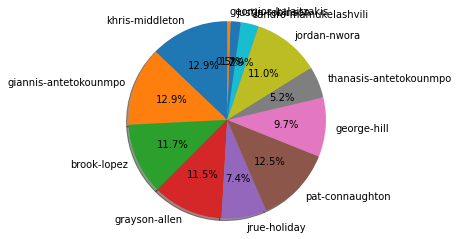

In [4]:
calculate_player_usage = lambda ps, ts : ps /ts
def calculate_rotation_minutes_percent(played_minutes,team_total_minutes):
    convert_60_to_100 = lambda t : t / 60
    player_minutes_f = float(played_minutes.split(":")[0])
    player_seconds_f = convert_60_to_100(float(played_minutes.split(":")[1]))
    
    return player_minutes_f + player_seconds_f

TOTAL_MINUTES = float(bucks_summary_stats["minutes"].replace(":","."))
labels = []
minutes_rotation_percents = []
for player in bucks_indvidual_stats:
    labels.append(player["playerSlug"])
    minutes_rotation_percents.append(calculate_rotation_minutes_percent(player["statistics"]["minutes"],TOTAL_MINUTES))
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(minutes_rotation_percents,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()


### Bucks' players score contribute pie chart

[0.15748031496062992, 0.25196850393700787, 0.06299212598425197, 0.07874015748031496, 0.09448818897637795, 0.15748031496062992, 0.007874015748031496, 0.047244094488188976, 0.11811023622047244, 0.0, 0.023622047244094488, 0.0]


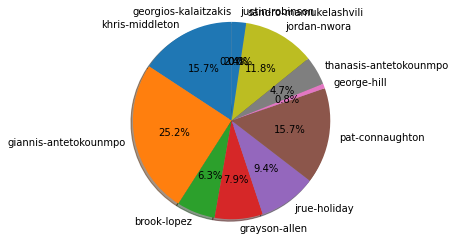

In [24]:
TOTAL_SCORE = int(match_stats["homeTeam"]["score"])

scoring_contributes = [ calculate_player_usage(buck["statistics"]["points"],TOTAL_SCORE) for buck in bucks_indvidual_stats]
print(scoring_contributes)

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(scoring_contributes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Bucks' points, rebounds, assists, blocks, steals, 3pt made leaders

In [45]:
players_score_dict = {}
players_rebounds_dict = {}
players_assists_dict = {}
players_blocks_dict = {}
players_steals_dict = {}
players_3pt_made_dict = {}
for player in bucks_indvidual_stats:
    players_score_dict["{}".format(player["playerSlug"])] = player["statistics"]["points"]
    players_rebounds_dict["{}".format(player["playerSlug"])] = player["statistics"]["reboundsTotal"]
    players_assists_dict["{}".format(player["playerSlug"])] = player["statistics"]["assists"]
    players_blocks_dict["{}".format(player["playerSlug"])] = player["statistics"]["blocks"]
    players_steals_dict["{}".format(player["playerSlug"])] = player["statistics"]["steals"]
    players_3pt_made_dict["{}".format(player["playerSlug"])] = player["statistics"]["threePointersPercentage"]



score_leader = max(players_score_dict,key=players_score_dict.get)
rebounds_leader = max(players_rebounds_dict,key=players_rebounds_dict.get)
assists_leader = max(players_assists_dict,key=players_assists_dict.get)
blocks_leader = max(players_blocks_dict,key=players_blocks_dict.get)
steals_leader = max(players_steals_dict,key=players_steals_dict.get)
leader_3pt =  max(players_3pt_made_dict,key=players_3pt_made_dict.get)
print("Scoring leader:",score_leader)
print("Rebounding leader:",rebounds_leader)
print("Assisting leader:",assists_leader)
print("Blocking leader:",blocks_leader)
print("Stealing leader:",steals_leader)
print("Top 3pt specialist:",leader_3pt)

Scoring leader: giannis-antetokounmpo
Rebounding leader: giannis-antetokounmpo
Assisting leader: giannis-antetokounmpo
Blocking leader: brook-lopez
Stealing leader: grayson-allen
Top 3pt specialist: brook-lopez
